# Spike Computational Neuroscience Community

<div style="font-family: Arial, sans-serif; margin: 20px;">
    <h1 style="text-align: center; color: #333;">EEG Processing: An Entry to the World of Brain Waves</h1>
    <h2 style="text-align: center; color: #555;"Piloting Brain Topomaps and Computing Time-Frequency Represantiation</h2>
    <p style="text-align: center; color: #666; font-size: 16px;">
        Author: Mohammadreza Shahsavari<br>
        Contact: <a href="mailto:mohamadrezashahsavary@gmail.com" style="color: #0066cc; text-decoration: none;">mohamadrezashahsavary@gmail.com</a>
    </p>
</div>

# Loading and Inspecting EEG data



## Run the Below Cell to Download the EDF Data

Run the following cell to download a sample EDF file containing EEG signals along with its associated metadata, such as channel names. After downloading, we will visualize the EEG signals and examine the Info object, which is a crucial data structure in MNE for handling EEG/MEG data. The Info object contains metadata including channel information, sampling frequency, and other relevant details about the recording.

In [3]:
# Installing the required library for reading EDF files
!pip install mne

# Dowloading the EDF data
import gdown
import os

eeg_edf_url = 'https://drive.google.com/uc?id=1iDUv8kOBeBWzEVnuNezryUSaIeJGyc40'

eeg_edf_file_name = 'EEGData.edf'


gdown.download(eeg_edf_url, eeg_edf_file_name, quiet=False)

eeg_edf_path = os.path.join('/content', eeg_edf_file_name)

print('\n\nEEG files are downloaded and can be found in the following paths:')
print(eeg_edf_path)

!ls -l /content

Downloading...
From: https://drive.google.com/uc?id=1iDUv8kOBeBWzEVnuNezryUSaIeJGyc40
To: /content/EEGData.edf
100%|██████████| 1.28M/1.28M [00:00<00:00, 77.8MB/s]



EEG files are downloaded and can be found in the following paths:
/content/EEGData.edf
total 1252
-rw-r--r-- 1 root root 1275936 Aug 10  2024 EEGData.edf
drwxr-xr-x 1 root root    4096 Mar 24 13:34 sample_data


In [7]:
import mne
import pyplot as plt

# Load the EDF file
raw = mne.io.read_raw_edf(eeg_edf_path, preload=True)

# Display basic information about the data
print(raw.info)



ModuleNotFoundError: No module named 'pyplot'

The `Info` object from our loaded EDF file, as shown above, contains several parameters that can be accessed like a dictionary. These parameters provide the following information:
**bads:** `[]`  
- No channels are marked as bad, meaning all 64 channels (as indicated by nchan) are good for analysis.

**ch_names:** `Fc5., Fc3., Fc1., Fcz., ...`  
- This EEG recording contains 64 channels with standard names following the 10-20 system.
- Only the first few are shown, but the full list would be accessible in the Info object.

**chs:** `64 EEG`  
- Confirms that there are 64 EEG channels.

**custom_ref_applied:** `False`  
- Indicates that the default reference is used, and no custom reference has been applied.

**highpass:** `0.0 Hz` and **lowpass:** `80.0 Hz`  
- These settings mean that all frequencies from 0 Hz (DC component) up to 80 Hz are included in the data.
- This range is typical for EEG, capturing the most relevant brain activity frequencies while filtering out high-frequency noise.

**meas_date:** `2009-08-12 16:15:00 UTC`  
- The recording was made on August 12, 2009, at 16:15 UTC.

**sfreq:** `160.0 Hz`  
- The EEG data was sampled at 160 Hz, meaning each second of data contains 160 sample points.

**subject_info:** `3 items (dict)`  
- The subject_info dictionary contains three items, likely detailing the subject's ID, age, and gender.
- Specific details aren’t shown in the printout.

**projs:** `[]`  
- No projections have been applied, meaning the data is in its raw form without any artifact correction through projection.


## Access `Info` Parameters

Info is a dictionary-like data structure, and its contents can be accessed using the following syntax:

In [ ]:
print(raw.info['ch_names'])

['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


# Plot EEG Signals

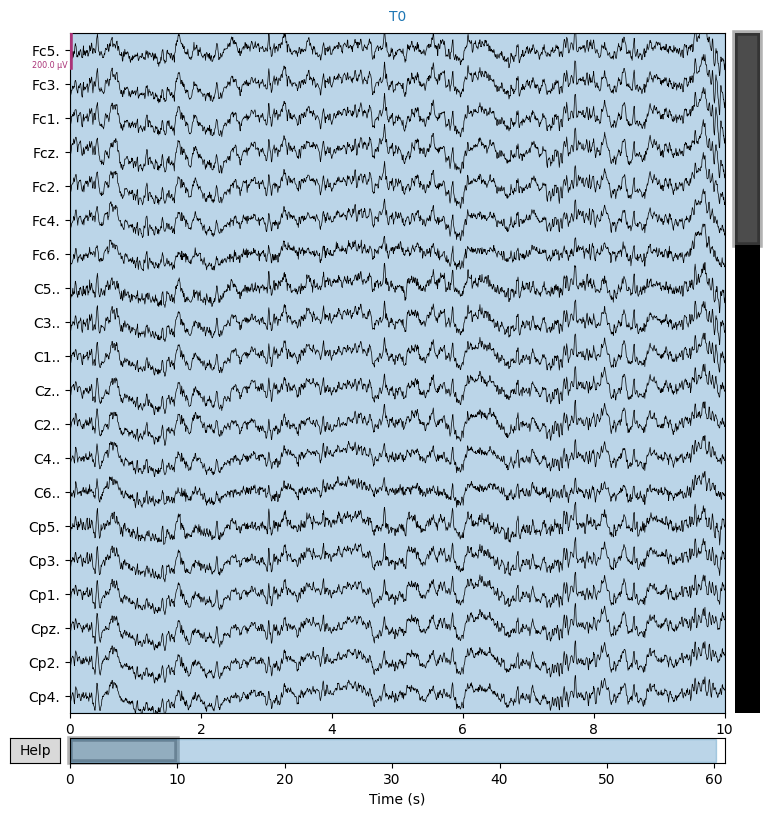

NameError: name 'plt' is not defined

In [9]:
# Adjust the scalings for better visibility
scaling_factor = 1e-4  # Adjust this value as needed
raw.plot(scalings=dict(eeg=scaling_factor))  # Apply the scaling factor
plt.show()


## Plotting Topographical Maps (Topomaps)

## 1. Introduction to Topographical Mapping

Topographical maps, or topomaps, are used in EEG analysis to visualize the distribution of electrical activity across the scalp at specific time points. They are a powerful tool for quickly assessing which regions of the brain are active at particular moments in time.

A topomap represents EEG data as a color-coded map over the 2D layout of the scalp, giving a spatial view of signal intensities.

To create these visualizations, we first need to determine the exact placement of each electrode on the scalp, which requires accurate channel location data.

## Channel Locations and Layouts

### 1. Understanding EEG Channel Layouts

Channel locations refer to where EEG electrodes are placed on the scalp, crucial for accurately mapping brain activity. Layouts define the arrangement of these electrodes, with standardized systems like the 10-20 system being common.

In EEG analysis, a montage is the specific arrangement of channels used to display the data. Some datasets already include a montage, while others do not. If a montage is not provided, we can apply a predefined one to ensure consistent and meaningful analysis.




## 3. Customizing Channel Layouts for Topomaps

### Step 3: Setting a Standard Montage

You might want to apply a standard montage to your data if you dont already have channel locations in your data. Lets start by checking if the channel locations exists in your EEG data.


In [10]:
print(raw.info['chs'][0])


{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fc5.', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}


To use a predefined standard montage, the channel names must match the exact names expected by the MNE library. Therefore, let's rename the channels to ensure they are correctly labeled.

In [11]:
# Adjust the mapping to ensure it aligns with standard 10-20 nomenclature
channel_mapping = {
    'Fc5.': 'FC5',
    'Fc3.': 'FC3',
    'Fc1.': 'FC1',
    'Fcz.': 'FCz',
    'Fc2.': 'FC2',
    'Fc4.': 'FC4',
    'Fc6.': 'FC6',
    'C5..': 'C5',
    'C3..': 'C3',
    'C1..': 'C1',
    'Cz..': 'Cz',
    'C2..': 'C2',
    'C4..': 'C4',
    'C6..': 'C6',
    'Cp5.': 'CP5',
    'Cp3.': 'CP3',
    'Cp1.': 'CP1',
    'Cpz.': 'CPz',
    'Cp2.': 'CP2',
    'Cp4.': 'CP4',
    'Cp6.': 'CP6',
    'Fp1.': 'Fp1',
    'Fpz.': 'Fpz',
    'Fp2.': 'Fp2',
    'Af7.': 'AF7',
    'Af3.': 'AF3',
    'Afz.': 'AFz',
    'Af4.': 'AF4',
    'Af8.': 'AF8',
    'F7..': 'F7',
    'F5..': 'F5',
    'F3..': 'F3',
    'F1..': 'F1',
    'Fz..': 'Fz',
    'F2..': 'F2',
    'F4..': 'F4',
    'F6..': 'F6',
    'F8..': 'F8',
    'Ft7.': 'FT7',
    'Ft8.': 'FT8',
    'T7..': 'T7',
    'T8..': 'T8',
    'T9..': 'T9',
    'T10.': 'T10',
    'Tp7.': 'TP7',
    'Tp8.': 'TP8',
    'P7..': 'P7',
    'P5..': 'P5',
    'P3..': 'P3',
    'P1..': 'P1',
    'Pz..': 'Pz',
    'P2..': 'P2',
    'P4..': 'P4',
    'P6..': 'P6',
    'P8..': 'P8',
    'Po7.': 'PO7',
    'Po3.': 'PO3',
    'Poz.': 'POz',
    'Po4.': 'PO4',
    'Po8.': 'PO8',
    'O1..': 'O1',
    'Oz..': 'Oz',
    'O2..': 'O2',
    'Iz..': 'Iz'
}

# Rename channels in the raw data
raw.rename_channels(channel_mapping)


<RawEDF | EEGData.edf, 64 x 9760 (61.0 s), ~4.8 MiB, data loaded>

In [12]:
print(raw.info['ch_names'])

['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'Fpz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


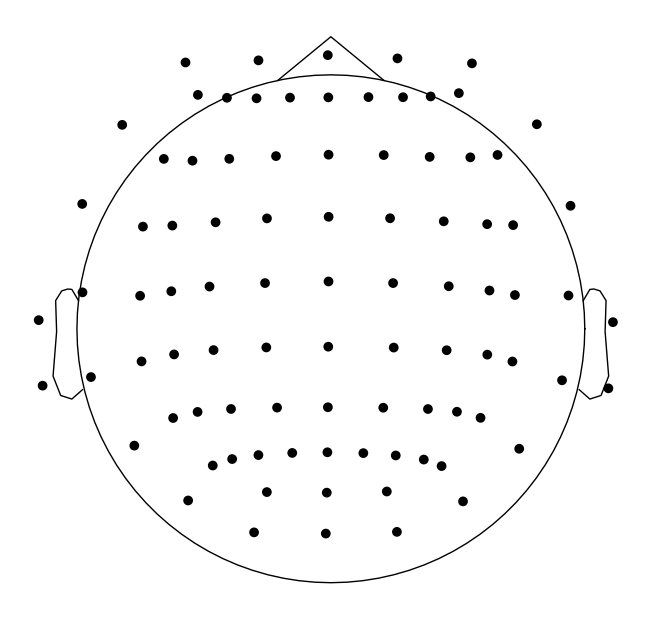

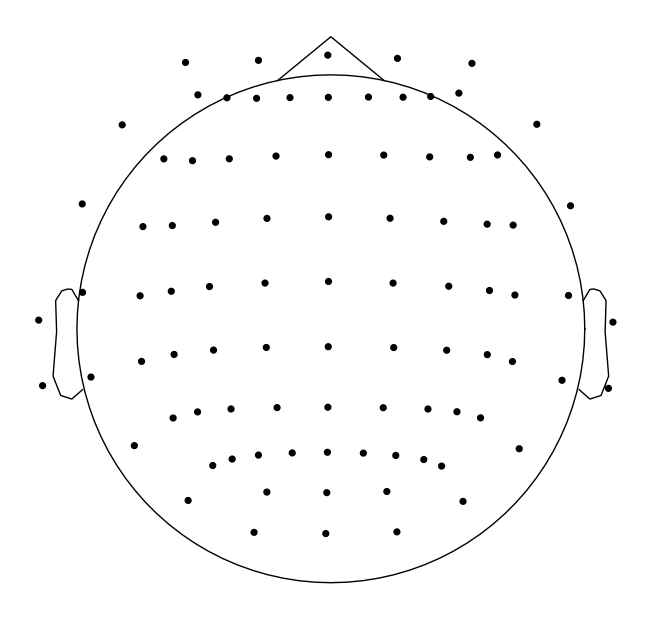

In [13]:
import mne

# Load a standard montage (10-20 system)
montage = mne.channels.make_standard_montage('standard_1020')

# Apply the montage to your raw data
raw.set_montage(montage)

# Optionally, plot the montage to visualize it
mne.viz.plot_montage(montage, show_names=False)


###Step 4: Customizing the Montage

You can also manually adjust the positions of specific channels or create a custom montage.

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


<ipython-input-14-ee4df341d548>:23: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mne.viz.plot_montage(custom_montage, show_names=True)


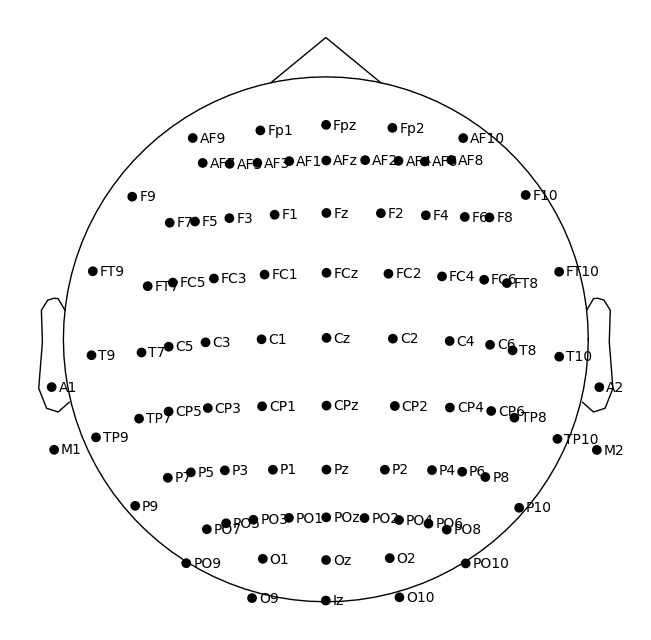

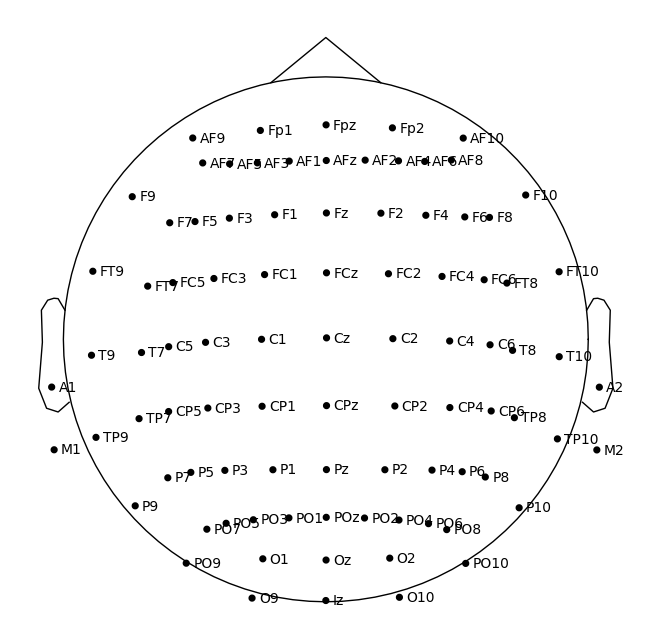

In [14]:
import mne
import numpy as np

# Load the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')

# Get the positions of the channels
positions = montage.get_positions()['ch_pos']

# Define the shift (e.g., shift all channels by 0.01 meters along the x-axis and y-axis)
shift = np.array([0.0, 0.01, 0.05])  # Modify the shift values as needed

# Apply the shift to all channel positions
shifted_positions = {ch: pos + shift for ch, pos in positions.items()}

# Create a new montage with shifted positions
custom_montage = mne.channels.make_dig_montage(ch_pos=shifted_positions, coord_frame='head')

# Apply the custom montage to your data
raw.set_montage(custom_montage)

# Plot the customized montage to visualize the shifted positions
mne.viz.plot_montage(custom_montage, show_names=True)


# Back on Visualizing Topomaps

Now, let's plot the topomaps for raw EEG data at specific time points.

### Step 1: Select Time Points

First, choose the time points at which you want to visualize the EEG activity. This can be done by picking a time range or specific time steps.


In [15]:
# Define the time points to visualize (in seconds)
# For example, let's choose time points around 1, 2, and 3 seconds
time_points = [1, 2, 3]  # Modify as needed


### Step 2: Plot Topomaps for Selected Time Points

Use the MNE function `plot_topomap` to visualize the topographical distribution of EEG signals at these time points.


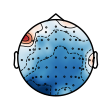

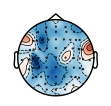

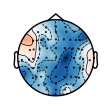

In [16]:
# Compute the average EEG data over the selected time points
# Using raw data, this will give us a snapshot of the EEG distribution at these moments

for t in time_points:
  # Extract data at the given time point
  time_index = raw.time_as_index(t)
  eeg_data, _ = raw[:, time_index]

  # Plot the topomap for this time point
  mne.viz.plot_topomap(np.reshape(eeg_data, (-1, )), raw.info)


This code will plot topomaps for the specified time points, showing the distribution of the raw EEG signal across the scalp.

##Customizing Topomaps: Color Scales, Interpolation, and Layouts

You can further customize your topomaps to better highlight specific features of the data.

### Customize Color Scales

Customizing color scales using vlim is crucial, especially when comparing brain activity across different time points. Without setting vlim, each topomap may use its own scale based on the data range at that specific time point. This can lead to inconsistencies, making it difficult to directly compare the topomaps since the color intensities might represent different amplitude ranges. By setting a consistent vlim, we ensure that all topomaps use the same scale, allowing for accurate and meaningful comparisons between the brain activity at different time points.


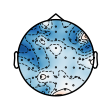

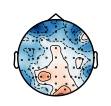

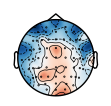

In [17]:
import mne

# Sample time points for topomaps
time_points = [0.01, 0.02, 0.03]  # Modify with actual times you want to plot

# Customize the color scale
for t in time_points:
    time_index = raw.time_as_index(t)
    eeg_data, _ = raw[:, time_index]


    # Plot topomap
    mne.viz.plot_topomap(
        eeg_data[:, 0],  # Data at the given time point
        raw.info,  # Info object containing channel locations

        vlim=(-1e-4, 1e-4),  # Set the color scale limits
    )



Here, `vmin` and `vmax` define the limits of the color scale, and `cmap` allows you to choose a different colormap (e.g., `'RdBu_r'` for a red-blue scale).

### Customizing Colormaps, Sensor Locations, Sensor Labels, and Interpolation

Colormap Customization: Adjust the color scheme to highlight specific features or make the topomap more visually intuitive.

Sensor Location Display: Shows where each electrode is placed on the scalp, helping to understand the spatial distribution of brain activity.

Sensor Name Display: Labels each electrode, making it easier to reference and identify specific sensors during analysis.

Interpolation: Controls the smoothness of the topomap by adjusting how colors blend between sensors, allowing for either sharp transitions or a more continuous representation of brain activity.


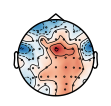

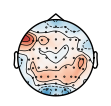

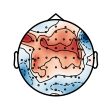

In [20]:

# Sample time points for topomaps
time_points = [0.1, 0.2, 0.3]  # Modify with actual times you want to plot

# Customize the color scale, colormap, and interpolation
for t in time_points:
    time_index = raw.time_as_index(t)
    eeg_data, _ = raw[:, time_index]

    # Plot topomap with the specified colormap and interpolation method
    mne.viz.plot_topomap(
        eeg_data[:, 0],  # Data at the given time point
        raw.info,  # Info object containing channel locations
        vlim=(-1e-4, 1e-4),  # Set the color scale limits

        cmap='RdBu_r',  # Use a different colormap, the other options are: 'YlOrRd', 'magma', 'Blues', 'Greys'
        sensors=True,  # Show sensor locations as black circles
        #names=raw.info['ch_names'],  # List of channel names
        image_interp='linear',  # Customize the interpolation method. The options are 'nearest', 'linear', and 'cubic'
    )


In this example, `contours` specifies the number of contour lines, `outlines='head'` adds a head outline to the plot, and `interpolation='cubic'` makes the map smoother.

### Step 5: Customize Layouts

You can also customize the layout of the plots, especially when plotting multiple topomaps.


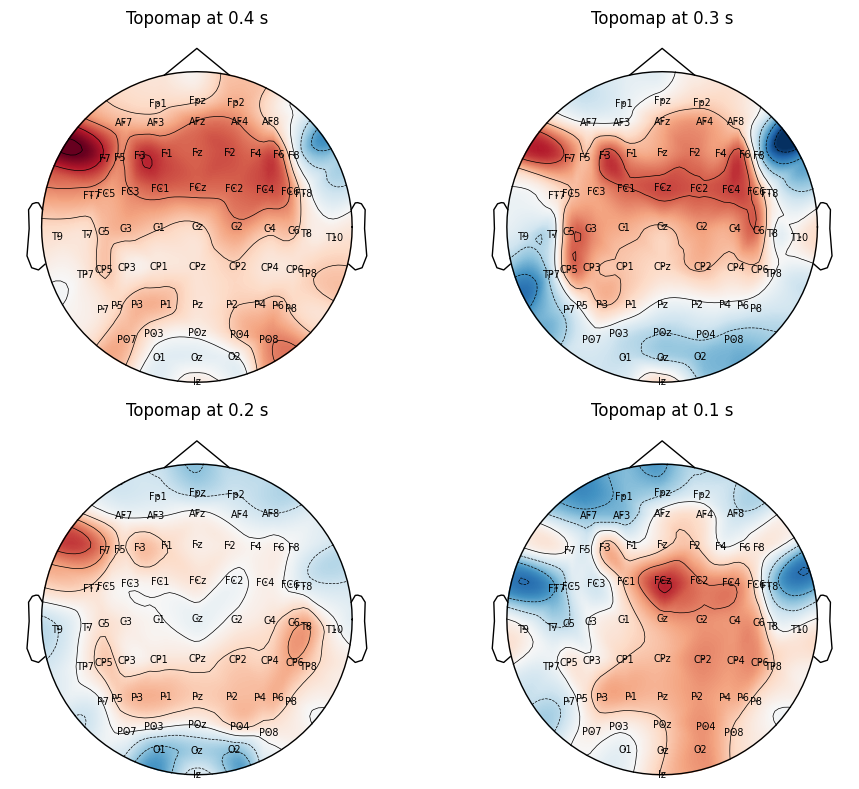

In [21]:
import mne
import matplotlib.pyplot as plt

# Sample time points for topomaps
time_points = [0.1, 0.2, 0.3, 0.4]  # Modify with actual times you want to plot

# Create a figure with subplots arranged in a grid layout
n_times = len(time_points)
n_rows = 2  # Number of rows in the grid
n_cols = 2  # Number of columns in the grid

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each time point and plot the topomap in the respective subplot
for i, t in enumerate(time_points):
    time_index = raw.time_as_index(t)
    eeg_data, _ = raw[:, time_index]

    # Plot topomap on the corresponding subplot
    mne.viz.plot_topomap(
        eeg_data[:, 0],  # Data at the given time point
        raw.info,  # Info object containing channel locations
        vlim=(-1e-4, 1e-4),  # Set the color scale limits
        cmap='RdBu_r',  # Use a red-blue reversed colormap
        sensors=True,  # Show sensor locations as black circles
        names=raw.info['ch_names'],  # List of channel names
        image_interp='cubic',  # Customize the interpolation method

        axes=axes[3 - i],  # Specify the subplot to plot on
        show=False  # Do not show the figure until all subplots are created
    )
    # Set title for each subplot
    axes[3 - i].set_title(f'Topomap at {t:.1f} s')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with all subplots
plt.show()


# Time-Frequency Analysis

## 1. Introduction to Time-Frequency Representation

Time-frequency analysis is a powerful method in EEG analysis to examine how the frequency content of the signal changes over time. Unlike standard Fourier analysis, which provides a static frequency representation, time-frequency analysis allows us to track dynamic changes in brain activity across different frequency bands (e.g., delta, theta, alpha, beta, gamma) as the brain responds to different stimuli or tasks.

- **Time-Frequency Representation (TFR):** TFR is a three-dimensional representation of EEG data that captures how power in different frequency bands varies over time. This is crucial for analyzing non-stationary signals like EEG, where brain activity might change rapidly.
- **Applications:** TFRs are commonly used to study oscillatory brain activity and event-related synchronization/desynchronization.

## 2. Computing Power Spectral Density (PSD)

Power Spectral Density (PSD) is a measure of the power (energy per frequency) of a signal as a function of frequency. It’s often the first step in analyzing the frequency content of EEG data.

### Step 1: Compute and Plot PSD

Let's compute the PSD using MNE's built-in functions.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


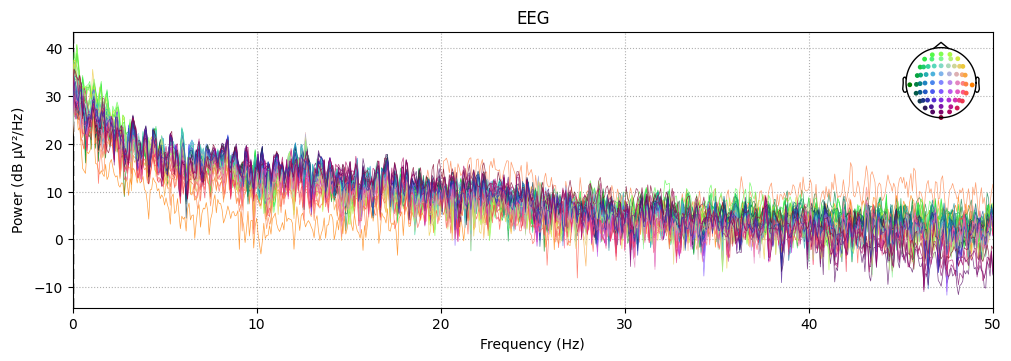

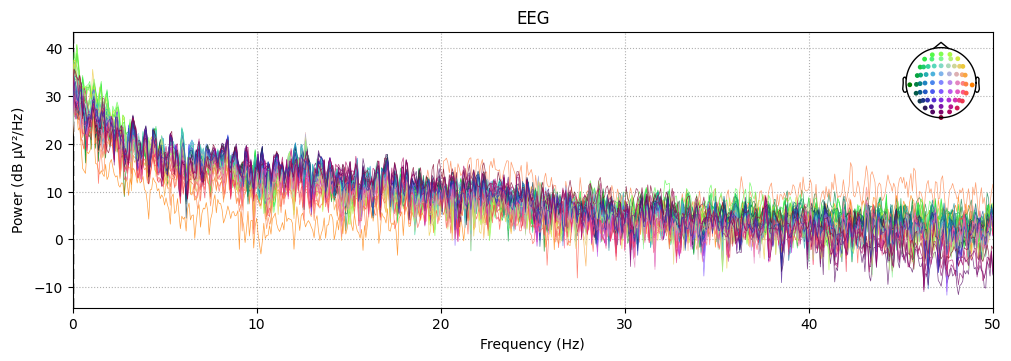

In [ ]:
# Plot the Power Spectral Density (PSD)
raw.plot_psd(fmax=50)  # Plot PSD up to 50 Hz


This code will produce a PSD plot showing how power is distributed across different frequencies up to 50 Hz. The `fmax` parameter limits the frequency range displayed.

### Step 2: Compute PSD for Specific Channels

You can also compute and plot the PSD for specific channels if you're interested in particular regions of the scalp.


[21]
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


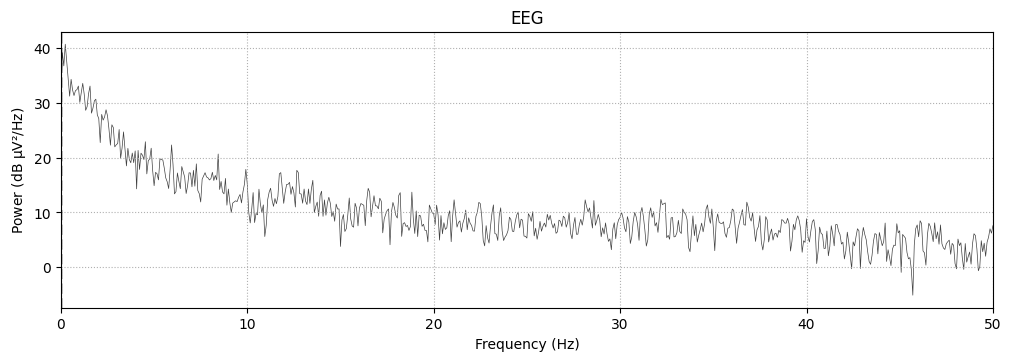

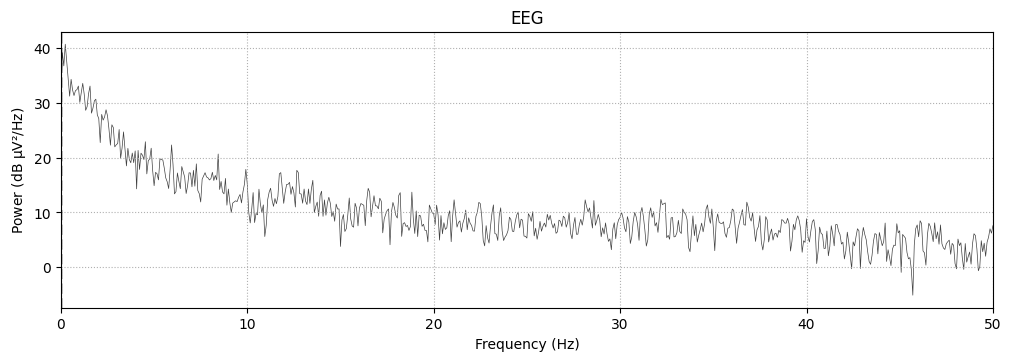

In [22]:
# Select specific channels (e.g., frontal channels)
picks = mne.pick_channels(raw.info['ch_names'], include=['Fp1'])

# Plot PSD for selected channels
raw.plot_psd(picks=picks, fmax=50)


This example plots the PSD specifically for the frontal channels (Fp1 and Fp2), which are often associated with cognitive processes.

## 3. Time-Frequency Decomposition with Morlet Wavelets

To perform time-frequency analysis, we use wavelets, which are small waves localized in both time and frequency. Morlet wavelets are commonly used in EEG analysis due to their ability to balance time and frequency resolution.

### Step 3: Apply Morlet Wavelets

Let's decompose the EEG signal using Morlet wavelets.


In [24]:
import numpy as np

# Define the frequency range of interest
frequencies = np.arange(2, 30, 2)  # Starts from 2 Hz


# Define the number of cycles in each frequency (trade-off between time and frequency resolution)
n_cycles = frequencies / 2.  # use shorter time windows for higher frequencies


# Compute the time-frequency representation using Morlet wavelets
power = mne.time_frequency.tfr_morlet(raw, freqs=frequencies, n_cycles=n_cycles,
                                      use_fft=True, return_itc=False, decim=3, n_jobs=1)


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
inst is Evoked, setting `average=False`


In this code:

- `frequencies` defines the range of frequencies to analyze.
- `n_cycles` controls the time-frequency trade-off, with more cycles giving better frequency resolution but worse time resolution.
- `tfr_morlet` applies the Morlet wavelet transform to the data.

## 4. Visualizing Time-Frequency Representations (TFRs)

After computing the TFR, it's essential to visualize the results to understand how power in different frequency bands varies over time.

### Step 4: Plot TFR for Specific Channels

Let's visualize the time-frequency representation for specific channels.


Applying baseline correction (mode: logratio)


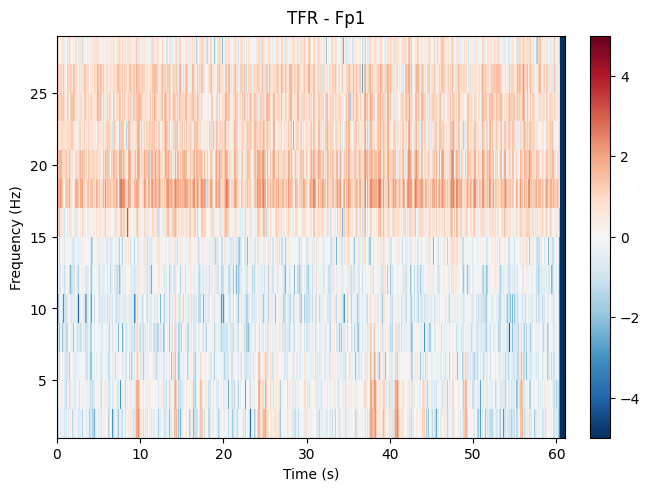

[<Figure size 640x480 with 2 Axes>]

In [27]:
power.plot([raw.ch_names.index('Fp1')], baseline=(None, 0), mode='logratio',
           vlim=(-5, 5), title='TFR - Fp1', show=True)


In this code:

- `baseline=(None, 0)` sets the baseline for normalization. This can be adjusted based on your data (e.g., using a pre-stimulus period as the baseline).
- `mode='logratio'` computes the log-ratio of power relative to the baseline, which is a common way to visualize TFRs.


# Topomaps of Time-Frequency Data

## 1. Creating Topomaps for Specific Frequency Bands

Topomaps for specific frequency bands allow you to visualize how the power in a particular frequency range is distributed across the scalp. This can be useful for identifying regions of interest during different cognitive or motor tasks.

### Step 1: Compute Time-Frequency Representation (TFR)

First, we need to compute the TFR as we did in the previous section.


In [ ]:
import numpy as np
import mne

# Define frequency range and cycles
frequencies = np.arange(2, 30, 2)  # Frequency range from 6 to 30 Hz
n_cycles = frequencies / 2.  # Number of cycles, shorter for higher frequencies

# Compute the TFR using Morlet wavelets
power = mne.time_frequency.tfr_morlet(raw, freqs=frequencies, n_cycles=n_cycles,
                                      use_fft=True, return_itc=False, decim=3, n_jobs=1)


NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").
inst is Evoked, setting `average=False`


In [ ]:
print(power.data.shape)

(64, 14, 3254)


###Step 2: Average Power Over a Specific Frequency Band

To create a topomap for a specific frequency band (e.g., alpha band: 8-12 Hz), we can average the power over the desired frequency range.

In [ ]:
# Select the frequency band (e.g., alpha band: 8-12 Hz)
freq_band = (8, 12)

# Crop the TFR object to the specified frequency band
alpha_power = power.copy().crop(fmin=freq_band[0], fmax=freq_band[1])

# Compute the average power across the specified frequency band
alpha_power_data = alpha_power.data.mean(axis=-2)  # Average across the frequency dimension

# Optionally, you can average across time or other dimensions depending on your analysis needs
average_alpha_power = alpha_power_data.mean(axis=-1)  # Average across time


In [ ]:
print(alpha_power.data.shape)

(64, 3, 3254)


In [ ]:
print(alpha_power_data.data.shape)

(64, 3254)


In [ ]:
print(average_alpha_power.data.shape)

(64,)


###Step 3: Plot the Topomap

Now, let's plot the topomap for the selected frequency band.

No baseline correction applied


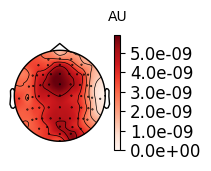

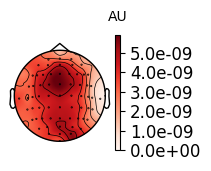

In [ ]:
# Plot the topomap for the alpha band
alpha_power.plot_topomap(ch_type='eeg', tmin=0.5, tmax=2.5, fmin=8, fmax=12
                        , show=True)


In this example:

- `ch_type='eeg'` specifies that we're plotting EEG data.
- `tmin` and `tmax` define the time window over which the power is averaged.
- `fmin` and `fmax` set the frequency range for the alpha band.

## 2. Visualizing Changes in Frequency Content Over Time

You can also visualize how the distribution of power in a specific frequency band changes over time by plotting a series of topomaps.

### Step 4: Create a Series of Topomaps Over Time

Let's create topomaps for the alpha band at different time intervals.


[0.5 1.  1.5 2.  2.5]
No baseline correction applied


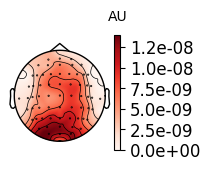

No baseline correction applied


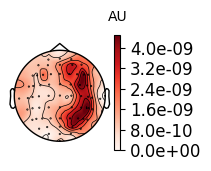

No baseline correction applied


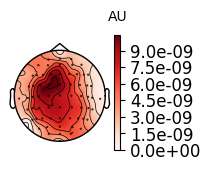

No baseline correction applied


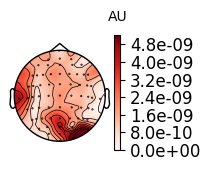

No baseline correction applied


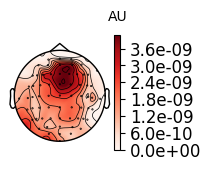

In [ ]:
# Define the time intervals for visualization
time_intervals = np.linspace(0.5, 2.5, 5)  # 5 time points between 0.5s and 2.5s
print(time_intervals)

# Plot topomaps for each time interval
for time_point in time_intervals:
    alpha_power.plot_topomap(ch_type='eeg', tmin=time_point, tmax=time_point+0.1, fmin=8, fmax=12, show=True)
